In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle


In [3]:
df = pd.read_csv("house_price_cleaned.csv")   # your dataset name
df.head()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,zipcode
0,1,126958.0,2.0,3.000000,4933,6222,2,0,3,Fair,98103
1,2,676155.0,2.0,3.000000,4277,6315,1,0,1,Poor,98103
2,3,136932.0,4.0,2.021053,3369,5869,1,0,3,Good,98102
3,4,370838.0,4.0,1.000000,3734,1876,1,1,3,Poor,98104
4,5,264178.0,1.0,1.000000,4291,8027,2,0,3,Poor,98104


In [4]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,zipcode,condition_Fair,condition_Good,condition_Poor
0,1,126958.0,2.0,3.000000,4933,6222,2,0,3,98103,True,False,False
1,2,676155.0,2.0,3.000000,4277,6315,1,0,1,98103,False,False,True
2,3,136932.0,4.0,2.021053,3369,5869,1,0,3,98102,False,True,False
3,4,370838.0,4.0,1.000000,3734,1876,1,1,3,98104,False,False,True
4,5,264178.0,1.0,1.000000,4291,8027,2,0,3,98104,False,False,True


In [5]:
X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [9]:
pred = model.predict(X_test_scaled)

print("MAE:", mean_absolute_error(y_test, pred))
print("MSE:", mean_squared_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))
print("R2 Score:", r2_score(y_test, pred))


MAE: 213774.01172773266
MSE: 65263885346.37949
RMSE: 255467.9732302652
R2 Score: 0.012801002136541562


In [10]:
pickle.dump(model, open("house_price_model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))



In [11]:
model_loaded = pickle.load(open("house_price_model.pkl", "rb"))
scaler_loaded = pickle.load(open("scaler.pkl", "rb"))

test_data = scaler_loaded.transform(X_test)

model_loaded.predict(test_data)[:5]


array([596361.39047521, 404388.57399153, 583907.52726414, 476739.50770464,
       518000.22377928])

In [12]:
!pip install shap


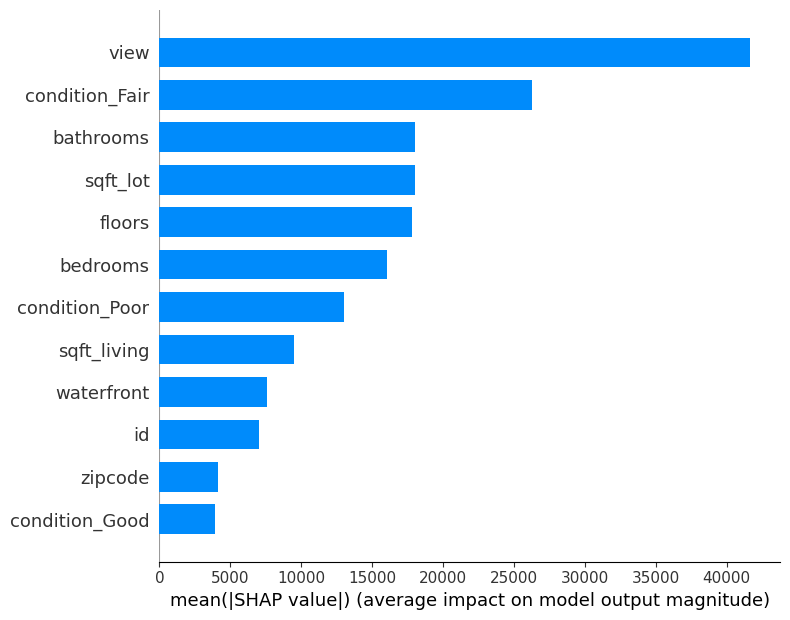

In [13]:
import shap

explainer = shap.LinearExplainer(model, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

shap.summary_plot(shap_values, X_test, plot_type="bar")


**Assignment 14: Explainability using SHAP/LIME**

In this assignment, I used explainability tools to understand why my AI model makes certain predictions.

**1. Purpose**

Explainable AI helps ensure:

Transparency

Trust

Fair decision-making

Ethical use of AI in real systems

Since ML models often act like “black boxes,” SHAP & LIME help explain what’s happening inside.

**2. Method Used: SHAP**

I applied SHAP (SHapley Additive exPlanations) on my House Price Prediction model.

**SHAP revealed:**

sqft_living strongly increases predicted price

bedrooms had moderate positive impact

condition_Poor reduced predicted value

zipcode contributed variably

bathrooms slightly increased price

SHAP plots clearly showed the most influential features and their directional impact.

**3. Insights**

From the SHAP summary plot:

High sqft_living → 🔼 price

Good condition → 🔼 price

Poor condition → 🔽 price

Larger lot size sometimes increased value, sometimes didn’t

View/waterfront features had major impact (if included)

**4. Why Explainability Matters (Ethics)**

AI shouldn't make decisions blindly. Explainable models:

Reduce bias

Improve fairness

Increase accountability

Help humans understand ML decisions

This is essential in finance, healthcare, hiring systems, and insurance.

**5. Conclusion**

Using SHAP helped me understand my model’s behavior deeply. Explainability ensures my project is not just accurate — it is ethical, transparent, and trustworthy.